In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
df=pd.read_csv('titanic_toy.csv')
df.head(10)

In [25]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Applying train test slip

In [27]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.isnull().sum()

In [ ]:
(X_train.isnull().mean())*100

In [ ]:
X_train.shape, X_test.shape


# Applying mean/median imputation by pandas

In [35]:
#for X_train
X_train['age_99']=X_train['Age'].fillna(99)
X_train['age_minus1']=X_train['Age'].fillna(-1)

X_train['fare_999']=X_train['Fare'].fillna(999)
X_train['fare_minus1']=X_train['Fare'].fillna(-1)
#for X_test
X_test['age_99']=X_test['Age'].fillna(99)
X_test['age_minus1']=X_test['Age'].fillna(-1)

X_test['fare_999']=X_test['Fare'].fillna(999)
X_test['fare_minus1']=X_test['Fare'].fillna(-1)

In [36]:
X_train.head(10)

,Age,Fare,Family,age_99,ageminus1,fare_999,fare_minus1,age_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208,40.0
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000,4.0
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000,47.0
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875,9.0
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458,20.0
213,30.0,13.0000,0,30.0,30.0,13.0000,13.0000,30.0
157,30.0,8.0500,0,30.0,30.0,8.0500,8.0500,30.0
780,13.0,7.2292,0,13.0,13.0,7.2292,7.2292,13.0
572,36.0,26.3875,0,36.0,36.0,26.3875,26.3875,36.0
77,NaN,8.0500,0,99.0,-1.0,8.0500,8.0500,-1.0


In [31]:
X_test.head(10)

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
707,42.0,26.2875,0,42.0,42.0,26.2875,26.2875
37,21.0,8.0500,0,21.0,21.0,8.0500,8.0500
615,24.0,65.0000,3,24.0,24.0,65.0000,65.0000
169,28.0,56.4958,0,28.0,28.0,56.4958,56.4958
68,17.0,7.9250,6,17.0,17.0,7.9250,7.9250
606,30.0,7.8958,0,30.0,30.0,7.8958,7.8958
630,80.0,30.0000,0,80.0,80.0,30.0000,30.0000
785,25.0,7.2500,0,25.0,25.0,7.2500,7.2500
660,50.0,133.6500,2,50.0,50.0,133.6500,133.6500
728,25.0,26.0000,1,25.0,25.0,26.0000,26.0000


# Checking variance, covariance, corelation and by graphical implementation checking for outlier and spread of data

In [37]:
# checking variance for X_train
print('X_train : ')
print('Original Age Variance : ',X_train['Age'].var())
print('Age_99 Variance : ',X_train['age_99'].var())
print('Age_minus1 Variance : ',X_train['ageminus1'].var())

print('Original Fare Variance : ',X_train['Fare'].var())
print('Fare_999 Variance : ',X_train['fare_999'].var())
print('Fare_minus1 Variance : ',X_train['fare_minus1'].var())
# checking variance for X_test
print('X_test : ')
print('Original Age Variance : ',X_test['Age'].var())
print('Age_99 Variance : ',X_test['age_99'].var())
print('Age_minus1 Variance : ',X_test['age_minus1'].var())

print('Original Fare Variance : ',X_test['Fare'].var())
print('Fare_999 Variance : ',X_test['fare_999'].var())
print('Fare_minus1 Variance : ',X_test['fare_minus1'].var())


X_train : 
Original Age Variance :  204.3495133904614
Age_99 Variance :  951.7275570187172
Age_minus1 Variance :  318.0896202624484
Original Fare Variance :  2448.197913706318
Fare_999 Variance :  47219.20265217623
Fare_minus1 Variance :  2378.5676784883503
X_test : 
Original Age Variance :  237.50093573154342
Age_99 Variance :  860.6790791287423
Age_minus1 Variance :  324.7533996359299
Original Fare Variance :  2872.7824991474345
Fare_999 Variance :  47729.1440719538
Fare_minus1 Variance :  2776.49968679277


<AxesSubplot: ylabel='Density'>

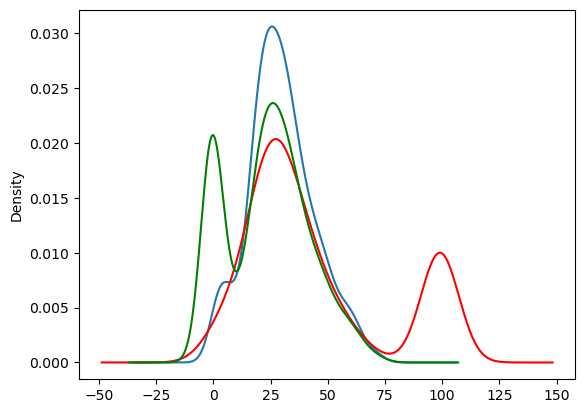

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of age
X_train['Age'].plot(kind='kde',ax=ax)

#distribution of mean_age
X_train['age_99'].plot(kind='kde',ax=ax,color='red')

#distribution of median_age
X_train['age_minus1'].plot(kind='kde',ax=ax,color='green')



<AxesSubplot: ylabel='Density'>

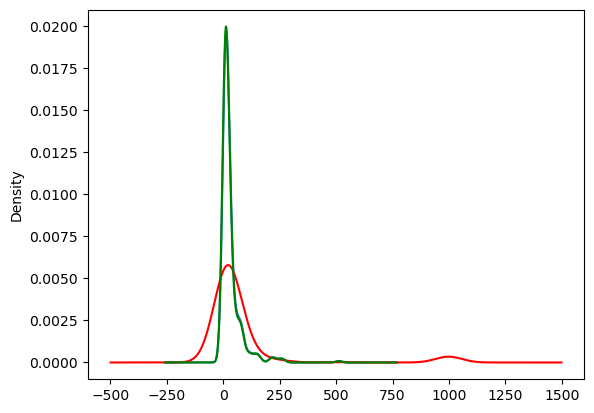

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of fare
X_train['Fare'].plot(kind='kde',ax=ax)

#distribution of fare_age
X_train['fare_999'].plot(kind='kde',ax=ax,color='red')

#distribution of fare_age
X_train['fare_minus1'].plot(kind='kde',ax=ax,color='green')



In [40]:
X_train.cov()

,Age,Fare,Family,age_99,ageminus1,fare_999,fare_minus1,age_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,204.349513
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,125.558364
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,-4.149246
age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,-189.535540
ageminus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620
fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,257.379887
fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,114.394141
age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620


In [41]:
#checking for correlation
X_train.corr()

,Age,Fare,Family,age_99,ageminus1,fare_999,fare_minus1,age_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,1.000000
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,0.142022
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,-0.140668
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,-0.344476
ageminus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000
fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,0.066411
fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.131514
age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000


<AxesSubplot: >

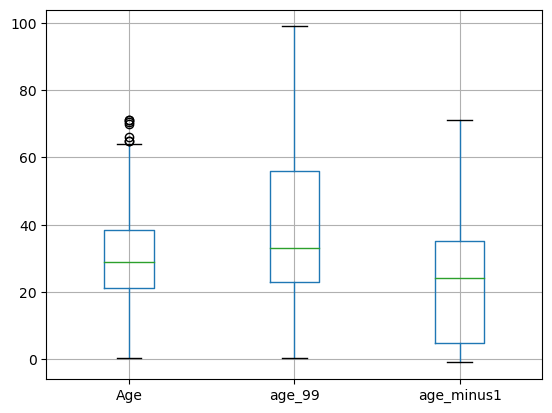

In [43]:
#checking for outliers age
X_train[['Age','age_99','age_minus1']].boxplot()

<AxesSubplot: >

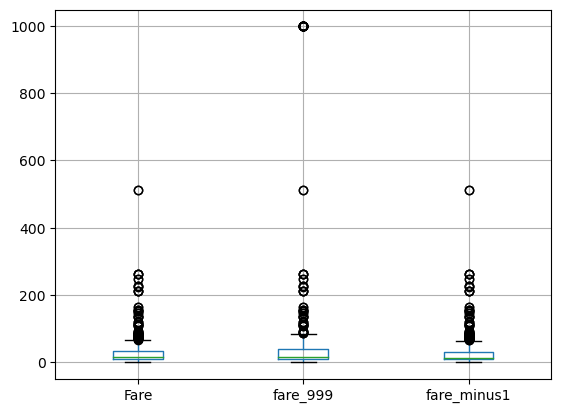

In [44]:
#checking for outliers fare
X_train[['Fare','fare_999','fare_minus1']].boxplot()

# by using sklearn

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [48]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [49]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [51]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [52]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [53]:
X_test

array([[4.200000e+01, 2.628750e+01, 0.000000e+00],
       [2.100000e+01, 8.050000e+00, 0.000000e+00],
       [2.400000e+01, 6.500000e+01, 3.000000e+00],
       [2.800000e+01, 5.649580e+01, 0.000000e+00],
       [1.700000e+01, 7.925000e+00, 6.000000e+00],
       [3.000000e+01, 7.895800e+00, 0.000000e+00],
       [8.000000e+01, 3.000000e+01, 0.000000e+00],
       [2.500000e+01, 7.250000e+00, 0.000000e+00],
       [5.000000e+01, 1.336500e+02, 2.000000e+00],
       [2.500000e+01, 2.600000e+01, 1.000000e+00],
       [3.500000e+01, 2.600000e+01, 0.000000e+00],
       [3.500000e+01, 9.000000e+01, 1.000000e+00],
       [5.500000e+01, 1.600000e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [1.900000e+01, 7.854200e+00, 1.000000e+00],
       [9.900000e+01, 1.524580e+01, 2.000000e+00],
       [4.900000e+01, 0.000000e+00, 0.000000e+00],
       [1.800000e+01, 9.990000e+02, 1.000000e+00],
       [6.500000e+01, 7.750000e